In [2]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt, cv2, keras, seaborn, os

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
w, h = 50, 50
FOLDER_PATH = '/kaggle/input/printed-digits-dataset/assets/'
X_train = []
y_train = []

In [4]:
X = []
y = []

for label in os.listdir(FOLDER_PATH):
    if label not in ['0', '10']:
        label_path = os.path.join(FOLDER_PATH, label)
        print(label_path)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
            
                image = cv2.imread(image_path)
                if image is not None:  
                    X.append(image)
                    y.append(int(label))  

/kaggle/input/printed-digits-dataset/assets/7
/kaggle/input/printed-digits-dataset/assets/2
/kaggle/input/printed-digits-dataset/assets/5
/kaggle/input/printed-digits-dataset/assets/8
/kaggle/input/printed-digits-dataset/assets/3
/kaggle/input/printed-digits-dataset/assets/1
/kaggle/input/printed-digits-dataset/assets/4
/kaggle/input/printed-digits-dataset/assets/9
/kaggle/input/printed-digits-dataset/assets/6


In [5]:
X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5658, 28, 28, 3)
y shape: (5658,)


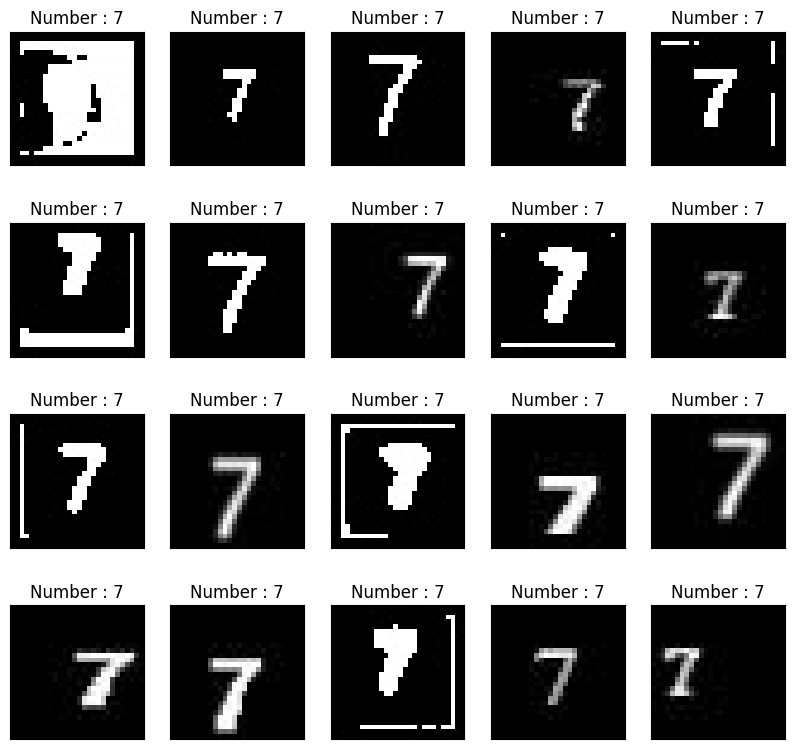

In [6]:
plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Number : {y[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.plot()

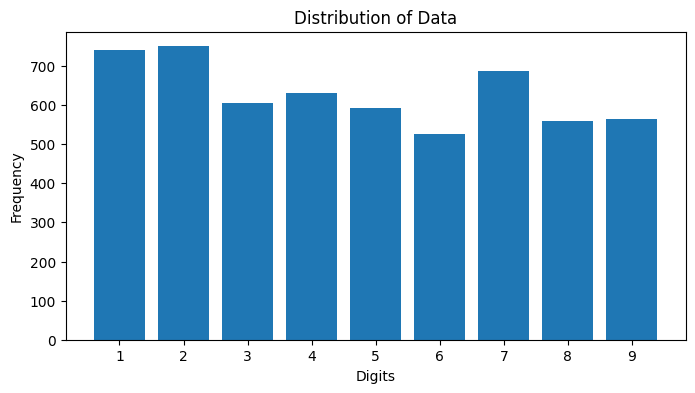

In [7]:
count = np.bincount(y)[1:]

plt.figure(figsize=(8, 4))
plt.bar(x=np.arange(9), height=count)
plt.xticks(ticks=np.arange(9), labels=np.arange(1, 10))
plt.title("Distribution of Data")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

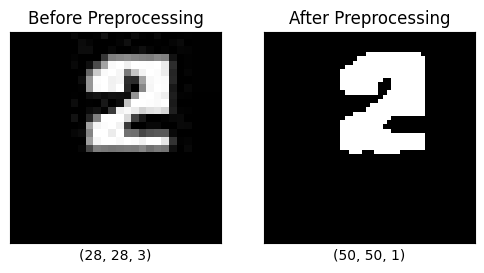

In [8]:
def image_preprocessing(image):  
    image = cv2.resize(image, (w, h))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

target = X[991]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Before Preprocessing')
plt.xlabel(f'{target.shape}')
plt.imshow(target, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
target_pre = image_preprocessing(target)
plt.xlabel(f'{target_pre.shape}')
plt.imshow(target_pre, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
def preprocess_mnist_images(images):
    return np.array([image_preprocessing(img) for img in images])

X = np.array([image_preprocessing(img) for img in X])

In [10]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5658, 50, 50, 1)
y shape: (5658,)


In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

In [24]:
dataGen = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2, shear_range=.1, rotation_range=10)

dataGen.fit(X_train)

In [25]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [26]:
print(f'X_train : {X_train.shape}\ny_train : {y_train.shape}\n\nX_val: {X_val.shape}\ny_val: {y_val.shape}\n\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train : (4526, 50, 50, 1)
y_train : (4526, 10)

X_val: (566, 50, 50, 1)
y_val: (566, 10)

X_test: (566, 50, 50, 1)
y_test: (566, 10)


In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.25),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,458 (876.79 KB)

 Trainable params: 224,458 (876.79 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(dataGen.flow(X_train, y_train), epochs=10, steps_per_epoch=500, validation_data=(X_val, y_val), shuffle=1)    

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1956 - loss: 2.1206 - val_accuracy: 0.5512 - val_loss: 1.4157
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5394 - loss: 1.3436 - val_accuracy: 0.7968 - val_loss: 0.6579
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7259 - loss: 0.8024 - val_accuracy: 0.8940 - val_loss: 0.3386
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8041 - loss: 0.5715 - val_accuracy: 0.9293 - val_loss: 0.2387
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8502 - loss: 0.4439 - val_accuracy: 0.9117 - val_loss: 0.2332
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8652 - loss: 0.4070 - val_accuracy: 0.9647 - val_loss: 0.1361
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8780 - loss: 0.3573 - val_accuracy: 0.9611 - val_loss: 0.1330
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8920 - loss: 0.3181 - val_accuracy: 

In [31]:
model.save('/kaggle/working/num_classifier.h5')

In [32]:
model = tf.keras.models.load_model('/kaggle/working/num_classifier.h5')

In [33]:
model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9862 - loss: 0.0675


[0.0966905951499939, 0.9752650260925293]

In [34]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<Axes: >

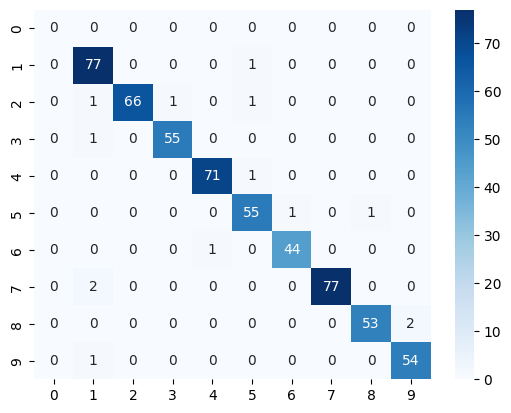

In [35]:
y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in y_pred]


confusion_matrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_pred_labels)
seaborn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

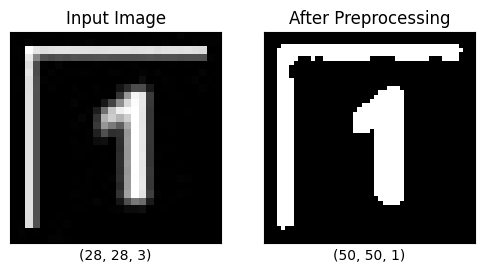

In [36]:
def image_preprocessing_input(image): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (w, h))
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

test_image = cv2.imread('/kaggle/input/printed-digits-dataset/assets/10/100.jpeg')
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(test_image, cmap='gray')
plt.xlabel(f'{test_image.shape}')
plt.xticks([])
plt.yticks([])

test_image_preprocessed = image_preprocessing_input(test_image)
plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
plt.imshow(test_image_preprocessed, cmap='gray')
plt.xlabel(f'{test_image_preprocessed.shape}')
plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
test_image_preprocessed = np.expand_dims(test_image_preprocessed, axis=0)
test_image_preprocessed.shape

(1, 50, 50, 1)

In [38]:
y_pred = model.predict(test_image_preprocessed)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(f'Prediction for sample: {y_pred_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
Prediction for sample: [1]
